<a href="https://colab.research.google.com/github/Matceo/SyS./blob/main/Serie%26TransformadaDeFourier./S%26S%3ATrigonom%C3%A9trica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingrese la componente x de a: 0.8
Ingrese la componente y de a: 0.2
Ingrese la componente x de b: 0.5
Ingrese la componente y de b: 0.7


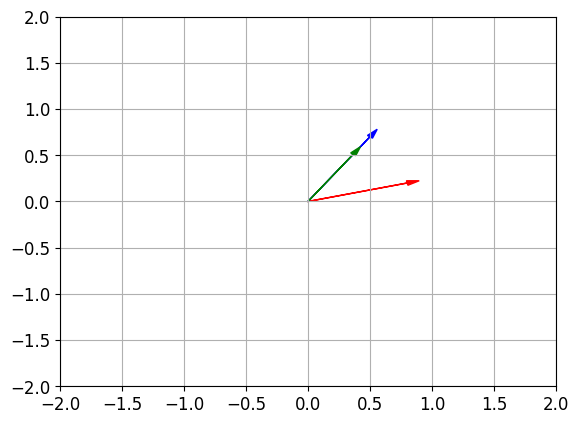

El vector proyectado es:  [0.36486486 0.51081081]


In [ ]:
#Ejercicio1

import numpy as np
import matplotlib.pyplot as plt

def proyeccion_lineal(a, b):
    #Calculamos el factor de escala de la proyección:
    escala=np.dot(a, b)/np.dot(b, b)

    #Calculamos el vector proyectado:
    proyectado=escala*b

    #Graficamos los vectores:
    fig, ax=plt.subplots()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.grid(True)
    ax.arrow(0, 0, a[0], a[1], head_width=0.05, head_length=0.1, color='r')
    ax.arrow(0, 0, b[0], b[1], head_width=0.05, head_length=0.1, color='b')
    ax.arrow(0, 0, proyectado[0], proyectado[1], head_width=0.05, head_length=0.1, color='g')
    plt.show()

    #Devolvemos el vector proyectado:
    return proyectado

a=np.array([float(input("Ingrese la componente x de a: ")),  float(input("Ingrese la componente y de a: "))])
b=np.array([float(input("Ingrese la componente x de b: ")),  float(input("Ingrese la componente y de b: "))])
proyectado=proyeccion_lineal(a, b)
print("El vector proyectado es: ", proyectado)

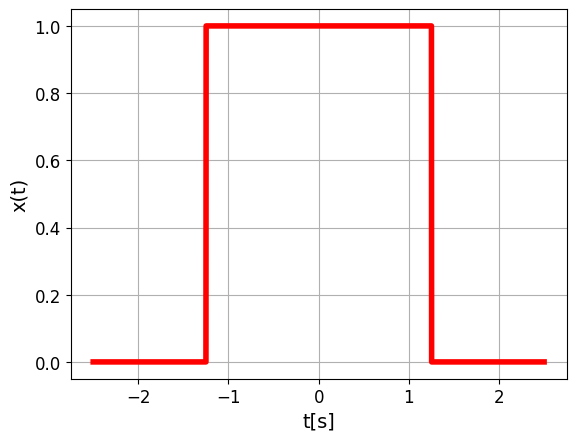

In [ ]:
#Ejercicio2

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
import sympy as sym
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

A=1 #Amplitud de la señal.
T=5 #Segundos de gráfica.
Fs=1000 #Frecuencia de muestreo definida.
tv=np.arange(-T/2, T/2, 1/Fs) #Vector de tiempo generado.
Nm=len(tv) #Número de muestras requeridas.
xo=np.zeros(len(tv))
xo[(tv>=-T/4)&(tv<=T/4)]=A

#Se crea la señal A y -A concatenando, para graficar la señal original:
plt.plot(tv, xo,'r', linewidth=4)
plt.grid()
plt.xlabel("t[s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.show()

a0= 
1.00000000000000
an = 
⎧                  1.0                     for n = 0
⎪                                                   
⎨0.636619772367581⋅sin(1.5707963267949⋅n)           
⎪────────────────────────────────────────  otherwise
⎩                   n                               
bn = 
0
armonico  1 =  0.636619772367581*cos(6.28318530717959*t)
armonico  2 =  0.636619772367581*cos(6.28318530717959*t)
armonico  3 =  0.636619772367581*cos(6.28318530717959*t) - 0.212206590789194*cos(18.8495559215388*t)
armonico  4 =  0.636619772367581*cos(6.28318530717959*t) - 0.212206590789194*cos(18.8495559215388*t)
armonico  5 =  0.636619772367581*cos(6.28318530717959*t) - 0.212206590789194*cos(18.8495559215388*t) + 0.127323954473516*cos(31.4159265358979*t)
armonico  6 =  0.636619772367581*cos(6.28318530717959*t) - 0.212206590789194*cos(18.8495559215388*t) + 0.127323954473516*cos(31.4159265358979*t)
armonico  7 =  0.636619772367581*cos(6.28318530717959*t) - 0.212206590789194*cos(18.849555921

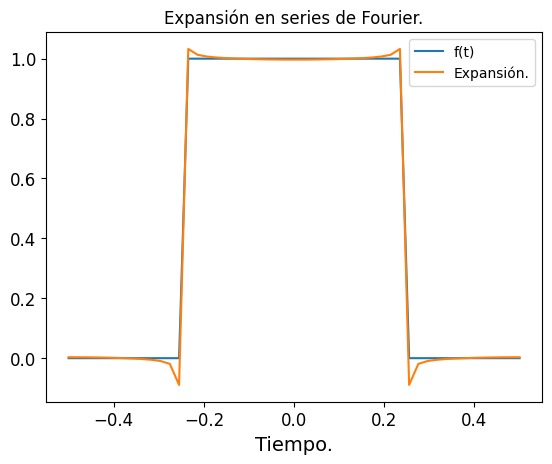

In [ ]:
#Ejercicio3


#Importar librerías.

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

#Definir variables simbólicas.

n=sym.symbols("n ", real=True)
t=sym.symbols("t ", real=True)

#Definir función periódica.

Tmin=-1/2
Tmax=1/2
T=Tmax-Tmin #Definimos el periodo.
wo=(2*np.pi)/T #Definimos omega.
x=sym.Heaviside(t+1/4)-sym.Heaviside(t-1/4) #Definimos la función.

#Calculamos los coeficientes de Fourier.

f_integrar=x #Función que vamos a integrar.
a0=(2/T)*(sym.integrate(f_integrar,(t,-1/4,1/4))) #Hallamos a0.
print("a0= ")
sym.pprint(a0) #Imprimir desde sympy.

#Calculamos la integral para an.

f_integrar=x*sym.cos(n*wo*t) #Función que vamos a integrar.
an=(4/T)*sym.integrate(f_integrar,(t,0,1/4)) #Hallamos an.
an=sym.simplify(an)
print("an = ")
sym.pprint(an)

#Calculamos la integral para bn.

f_integrar=x*sym.sin(n*wo*t) #Función que vamos a integrar.
bn=(2/T)*sym.integrate(f_integrar,(t,-1/4,1/4)) #Hallamos bn.
bn=sym.simplify(bn)
print("bn = ")
sym.pprint(bn)

#Usando los coeficientes, representamos la expansión en series de Fourier.

#Definimos el número de armónicos para la expansión.

Serie=0
Armonicos=25

for i in range(1, Armonicos+1):

  an_c=an.subs(n,i)
  if abs(an_c)<0.0001: an_c=0 #Términos coseno de la serie.
  Serie=Serie+an_c*sym.cos(i*wo*t)

Serie=a0/2+Serie #Expansión final de la serie.

print("f(t)= ")
sym.pprint(Serie)

#Graficamos la función periódica original y su expansión en series de Fourier.

#Convertimos la expresión sympy a una función evaluable.

fserie=sym.lambdify(t,serie)
f=sym.lambdify(t,x)

#Creamos un vector de tiempo para la gráfica.

v_tiempo=np.linspace(Tmin, Tmax, 50)

#Evaluamos las funciones.

fserieG=fserie(v_tiempo)
fG=f(v_tiempo)
plt.plot(v_tiempo, fG, label="f(t)")
plt.plot(v_tiempo, fserieG, label="Expansión.")
plt.xlabel("Tiempo.")
plt.legend()
plt.title("Expansion en serie de Fourier.")
plt.show()